# **Binary Classification on ‘Customer_Churn’using Keras**

Customer churn, in simple terms means that the customer has stopped doing business with the company
and this is a common problem when it comes to telecom industries. To avoid this, companies use predictive
analysis to gauge the factors responsible for a customer to leave the company. These churn prediction
models help in finding out the customer base that are most likely to churn out.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
df=pd.read_csv('/content/customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## **A) Data Manipulation:**



### **a. Find the total number of male customers**

In [10]:
#df[df['gender']=='Male'].shape[0]
sum(df['gender']=='Male')

3555

### **b. Find the total number of customers whose Internet Service is ‘DSL’**

In [11]:
sum(df['InternetService']=='DSL')

2421

### **c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’**

In [12]:
new_customer=df[(df['gender']=='Female') & (df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


### **d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’**

In [13]:
df['TotalCharges'].dtypes

dtype('O')

In [14]:
df['TotalCharges'].replace(' ',0,inplace=True)

In [15]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [16]:
new_customer=df[(df['tenure']<10)|(df['TotalCharges']<500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


## **B) Data Visualization:**


### **a. Build a pie-chart to show the distribution of customers would be churning out**

In [17]:
names=df['Churn'].value_counts().keys().tolist()
sizes=df['Churn'].value_counts().tolist()

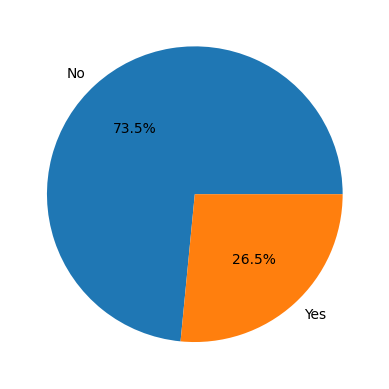

In [18]:
plt.pie(sizes,labels=names,autopct='%0.1f%%')
plt.show()

### **b. Build a bar-plot to show the distribution of ‘Internet Service’**

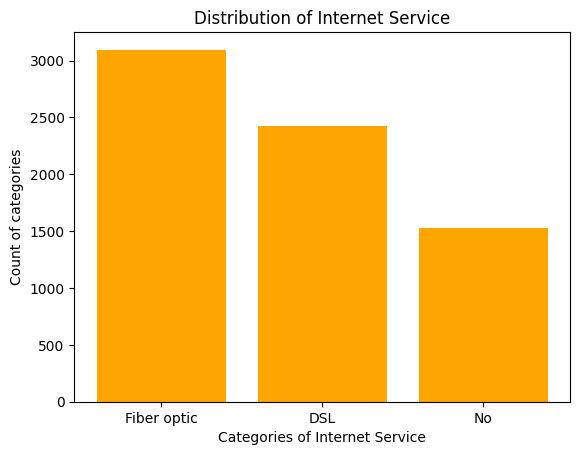

In [19]:
plt.bar(df['InternetService'].value_counts().keys().tolist(),df['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.show()

## **C) Model Building:**


### **a. Build a sequential model using Keras, to find out if the customer would churn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
df['Churn']=le.fit_transform(df['Churn'])

In [23]:
x=df[['tenure']]
y=df[['Churn']]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

##### **i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.**

##### **ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function**

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model=Sequential()

In [28]:
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

##### **iii. Use ‘Adam’ as the optimization algorithm**

In [29]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

##### **iv. Fit the model on the train set, with number of epochs to be 150**


In [30]:
model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7524 - loss: 0.6530 - val_accuracy: 0.7539 - val_loss: 0.5100
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7574 - loss: 0.5153 - val_accuracy: 0.7553 - val_loss: 0.5180
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7407 - loss: 0.5110 - val_accuracy: 0.7283 - val_loss: 0.5133
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7406 - loss: 0.5137 - val_accuracy: 0.7283 - val_loss: 0.5229
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.5225 - val_accuracy: 0.7283 - val_loss: 0.5119
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.5179 - val_accuracy: 0.7283 - val_loss: 0.5101
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7265 - loss: 0.5273 - val_accuracy: 0.7283 - val_loss: 0.5105
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5228 - val_accu

In [63]:
# mean accuracy
np.mean(model.history.history['val_accuracy'])*100

np.float64(75.1424515247345)

##### **v. Predict the values on the test set and build a confusion matrix**

In [32]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,y_pred)

array([[1395,  144],
       [ 379,  195]])

##### **vi. Plot the ‘Accuracy vs Epochs’ graph**

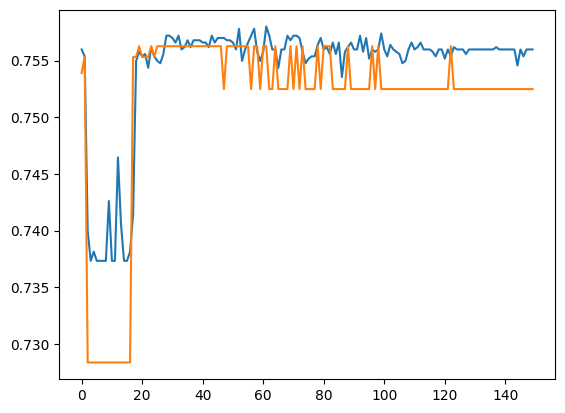

In [35]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

### **b. Build the 2nd model using same target and feature variables:**


##### **i. Add a drop-out layer after the input layer with drop-out value of 0.3**
##### **ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2**

In [36]:
model_2=Sequential()

In [37]:
from keras.layers import Dropout

In [38]:
model_2.add(Dense(12,input_dim=1,activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(8,activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1,activation='sigmoid'))

Drop-out value of 0.3 means that 70% of the nodes in the input layer will be dropped out.

Drop-out value of 0.2 means that 80% of the nodes in the hidden layer will be dropped out.

In [39]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model_2.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5756 - loss: 0.9109 - val_accuracy: 0.7283 - val_loss: 0.5190
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.6046 - val_accuracy: 0.7283 - val_loss: 0.5189
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.5612 - val_accuracy: 0.7283 - val_loss: 0.5164
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.5558 - val_accuracy: 0.7283 - val_loss: 0.5263
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.5517 - val_accuracy: 0.7283 - val_loss: 0.5201
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7316 - loss: 0.5327 - val_accuracy: 0.7283 - val_loss: 0.5254
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7301 - loss: 0.5396 - val_accuracy: 0.7283 - val_loss: 0.5212
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7436 - loss: 0.5299 - val_accu

In [43]:
np.mean(model.history.history['val_accuracy'])

np.float64(0.751424515247345)

##### **iii. Predict the values on the test set and build a confusion matrix**

In [41]:
y_pred=model_2.predict(x_test)
y_pred=(y_pred>0.5)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [42]:
confusion_matrix(y_test,y_pred)

array([[1539,    0],
       [ 574,    0]])

##### **iv. Plot the ‘Accuracy vs Epochs’ graph**

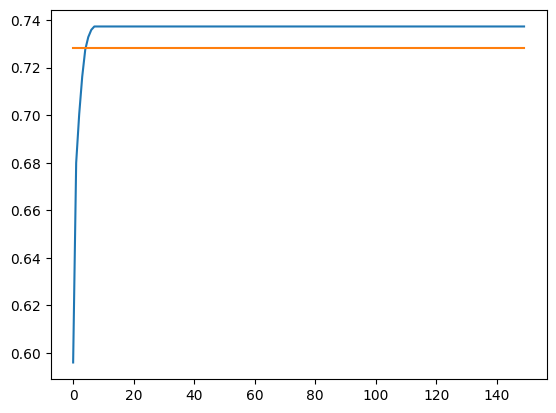

In [44]:
plt.plot(model_2.history.history['accuracy'])
plt.plot(model_2.history.history['val_accuracy'])
plt.show()

By looking at this graph, we can infer that the validation accuracy is constantly 73%.


Now, this tells us that something is wrong with our model.
The most probable explanation for this is the drop-out percentage is very high for the input
layer and the hidden layer and thus the model which we have built might be underfitting
the data

### **c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:**


In [46]:
x=df[['tenure','MonthlyCharges','TotalCharges']]

In [47]:
x.dtypes

,0
tenure,int64
MonthlyCharges,float64
TotalCharges,float64


In [52]:
y=df[['Churn']]

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

##### **i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.**

##### **ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function**

In [55]:
model_3=Sequential()

In [56]:
model_3.add(Dense(12,input_dim=3,activation='relu'))
model_3.add(Dense(8,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))

##### **iii. Use ‘Adam’ as the optimization algorithm**


In [57]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

##### **iv. Fit the model on the train set, with number of epochs to be 150**


In [58]:
model_3.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6183 - loss: 14.5950 - val_accuracy: 0.2778 - val_loss: 6.2789
Epoch 2/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5414 - loss: 2.6376 - val_accuracy: 0.2735 - val_loss: 2.5295
Epoch 3/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5443 - loss: 1.3139 - val_accuracy: 0.6290 - val_loss: 0.9537
Epoch 4/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6029 - loss: 0.8578 - val_accuracy: 0.6678 - val_loss: 0.6420
Epoch 5/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.7766 - val_accuracy: 0.7799 - val_loss: 0.6528
Epoch 6/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7544 - loss: 0.6228 - val_accuracy: 0.7738 - val_loss: 0.8155
Epoch 7/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7476 - loss: 0.7482 - val_accuracy: 0.7818 - val_loss: 0.7047
Epoch 8/150
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.6827 - val_acc

In [59]:
np.mean(model_3.history.history['val_accuracy'])

np.float64(0.7281432471672694)

##### **v. Predict the values on the test set and build a confusion matrix**


In [60]:
y_pred=model_3.predict(x_test)
y_pred=(y_pred>0.5)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [61]:
confusion_matrix(y_test,y_pred)

array([[1390,  149],
       [ 289,  285]])

##### **vi. Plot the ‘Accuracy vs Epochs’ graph**

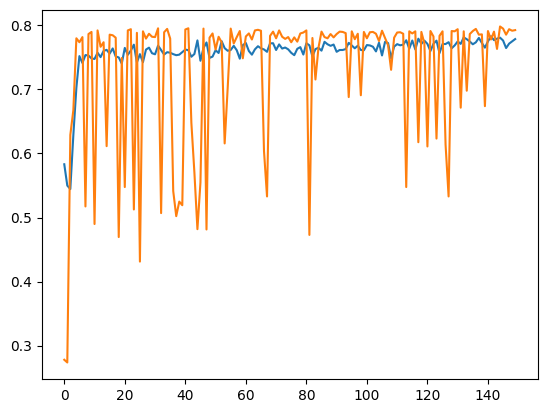

In [62]:
plt.plot(model_3.history.history['accuracy'])
plt.plot(model_3.history.history['val_accuracy'])
plt.show()

There is a constant fluctuation in the validation
accuracy.

## **Conclusion:**
The first model gave us a mean validation accuracy of 75.14%, the second model had accuracy
of 75.14% and the third model had a mean validation accuracy of 72.81%.


The second model we added two dropout layers with high
probabilities of dropout.


Now, there could be many factors why third model’s accuracy was less than that of first model.
Most probably one or more of the features used during the model building could be of less
significance leading to the reduction in accuracy.


It should also be kept in mind that these accuracy values are very specific to the
hyperparameters used during the model building process such as optimizers, activation
functions and number of epochs. If we were to tweak these hyperparameters we would get
completely different accuracy values for all the three models.